In [1]:
#import all the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import the file/dataset
df= pd.read_csv(r'C:\Users\ILLO STEPHANIE NZUBE\Downloads\NigeriaInflationRates.csv')

#To normalize the column names
df.columns=df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace(r'[^a-z0-9_]', '',regex=True)

In [3]:
df.head()

,year,month,inflation_rate,crude_oil_price,production,crude_oil_export,cpi_food,cpi_energy,cpi_health,cpi_transport,cpi_communication,cpi_education
0,2008,1,8.6,94.26,2.17,1.72,75.534431,84.612846,83.863139,86.530038,83.129440,75.284466
1,2008,2,8.0,98.15,2.08,1.63,75.154185,85.231632,83.365891,88.355236,82.889814,75.457619
2,2008,3,7.8,103.73,2.06,1.61,78.242523,83.251516,86.082993,84.376304,81.893471,74.826847
3,2008,4,8.2,116.73,1.96,1.51,79.434268,84.348830,89.445332,88.600334,93.937865,73.664248
4,2008,5,9.7,126.57,2.05,1.60,80.783677,85.574027,90.540461,87.932833,97.553285,74.880442


In [4]:
#To include a date column
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))
df.head()

,year,month,inflation_rate,crude_oil_price,production,crude_oil_export,cpi_food,cpi_energy,cpi_health,cpi_transport,cpi_communication,cpi_education,date
0,2008,1,8.6,94.26,2.17,1.72,75.534431,84.612846,83.863139,86.530038,83.129440,75.284466,2008-01-01
1,2008,2,8.0,98.15,2.08,1.63,75.154185,85.231632,83.365891,88.355236,82.889814,75.457619,2008-02-01
2,2008,3,7.8,103.73,2.06,1.61,78.242523,83.251516,86.082993,84.376304,81.893471,74.826847,2008-03-01
3,2008,4,8.2,116.73,1.96,1.51,79.434268,84.348830,89.445332,88.600334,93.937865,73.664248,2008-04-01
4,2008,5,9.7,126.57,2.05,1.60,80.783677,85.574027,90.540461,87.932833,97.553285,74.880442,2008-05-01


In [5]:
#Data overview
df.shape

(198, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   year               198 non-null    int64         
 1   month              198 non-null    int64         
 2   inflation_rate     198 non-null    float64       
 3   crude_oil_price    197 non-null    float64       
 4   production         197 non-null    float64       
 5   crude_oil_export   197 non-null    float64       
 6   cpi_food           198 non-null    float64       
 7   cpi_energy         198 non-null    float64       
 8   cpi_health         198 non-null    float64       
 9   cpi_transport      198 non-null    float64       
 10  cpi_communication  198 non-null    float64       
 11  cpi_education      198 non-null    float64       
 12  date               198 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(10), int64(2)
memory usage: 20.2 KB

In [7]:
#Checking for missing values
df.isnull().sum()

year                 0
month                0
inflation_rate       0
crude_oil_price      1
production           1
crude_oil_export     1
cpi_food             0
cpi_energy           0
cpi_health           0
cpi_transport        0
cpi_communication    0
cpi_education        0
date                 0
dtype: int64

In [8]:
#Find the rows with the null values
rows_with_null = df[df.isnull().any(axis=1)]
rows_with_null

,year,month,inflation_rate,crude_oil_price,production,crude_oil_export,cpi_food,cpi_energy,cpi_health,cpi_transport,cpi_communication,cpi_education,date
183,2023,4,22.22,NaN,NaN,NaN,640.043131,444.157193,409.360422,472.364875,226.482519,410.271828,2023-04-01


In [9]:
#Since the number of missing values is very small, we can remove it
df=df.dropna()    #doesn't need (inplace=True) because we are creating a new dataframe

df.isnull().sum()

#Or we can use the KNN imputer
#from sklearn.impute import KNNImputer
#knn_imputer = KNNImputer(n_neighbors=3)
#df_knn = pd.DataFrame(knn_imputer.fit_transform(df), columns = df.columns, index=df.index)


year                 0
month                0
inflation_rate       0
crude_oil_price      0
production           0
crude_oil_export     0
cpi_food             0
cpi_energy           0
cpi_health           0
cpi_transport        0
cpi_communication    0
cpi_education        0
date                 0
dtype: int64

In [10]:
df.isnull().sum()
df.shape

(197, 13)

In [11]:
#Checking for duplicates

duplicates = df.duplicated()
number_of_duplicates = duplicates.sum()
print("The number of duplicates is", number_of_duplicates)

The number of duplicates is 0


In [12]:
#Time for Summary Statistics
#df.describe()
df=df.sort_values('date')
df.head()

,year,month,inflation_rate,crude_oil_price,production,crude_oil_export,cpi_food,cpi_energy,cpi_health,cpi_transport,cpi_communication,cpi_education,date
0,2008,1,8.6,94.26,2.17,1.72,75.534431,84.612846,83.863139,86.530038,83.129440,75.284466,2008-01-01
1,2008,2,8.0,98.15,2.08,1.63,75.154185,85.231632,83.365891,88.355236,82.889814,75.457619,2008-02-01
2,2008,3,7.8,103.73,2.06,1.61,78.242523,83.251516,86.082993,84.376304,81.893471,74.826847,2008-03-01
3,2008,4,8.2,116.73,1.96,1.51,79.434268,84.348830,89.445332,88.600334,93.937865,73.664248,2008-04-01
4,2008,5,9.7,126.57,2.05,1.60,80.783677,85.574027,90.540461,87.932833,97.553285,74.880442,2008-05-01


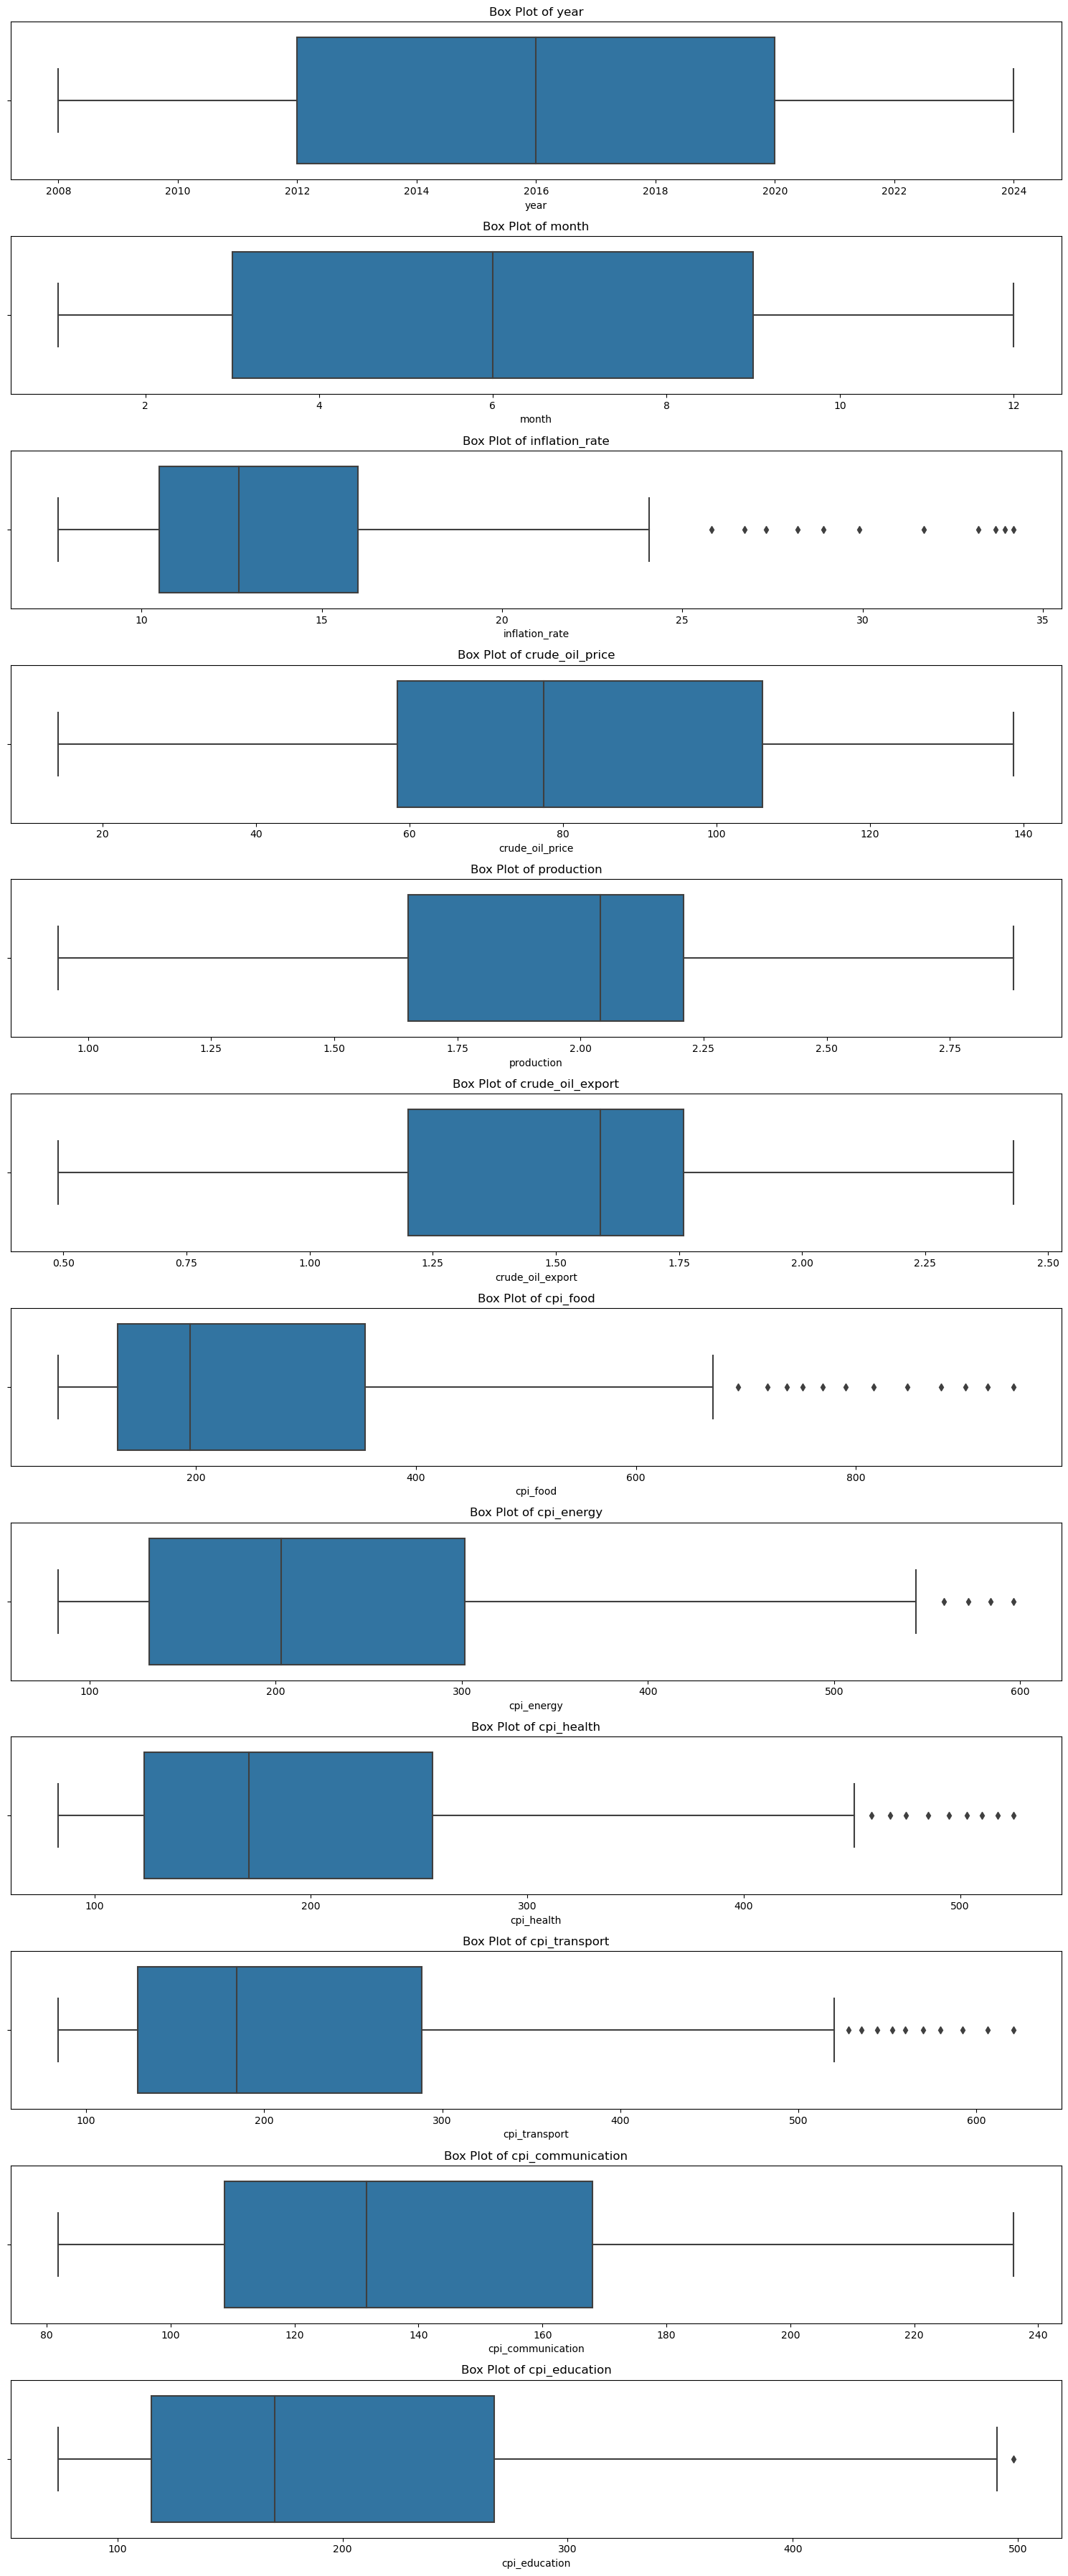

In [13]:
#To plot the box plots
numerical_features = df.select_dtypes(include=['float64','int64']).columns
plt.figure(figsize=(15, len(numerical_features)*3))

for i, col in enumerate(numerical_features,1):
    plt.subplot(len(numerical_features), 1, i)
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot of {col}")
    plt.tight_layout()
    
plt.show()

In [15]:
#Time for Univariate Graphical analysis

cat_df = df.select_dtypes(include=['object'])

numerical_df = df.select_dtypes(include=['int64', 'float64'])


In [16]:
num_cols = len(numerical_df.columns)
num_cols

12

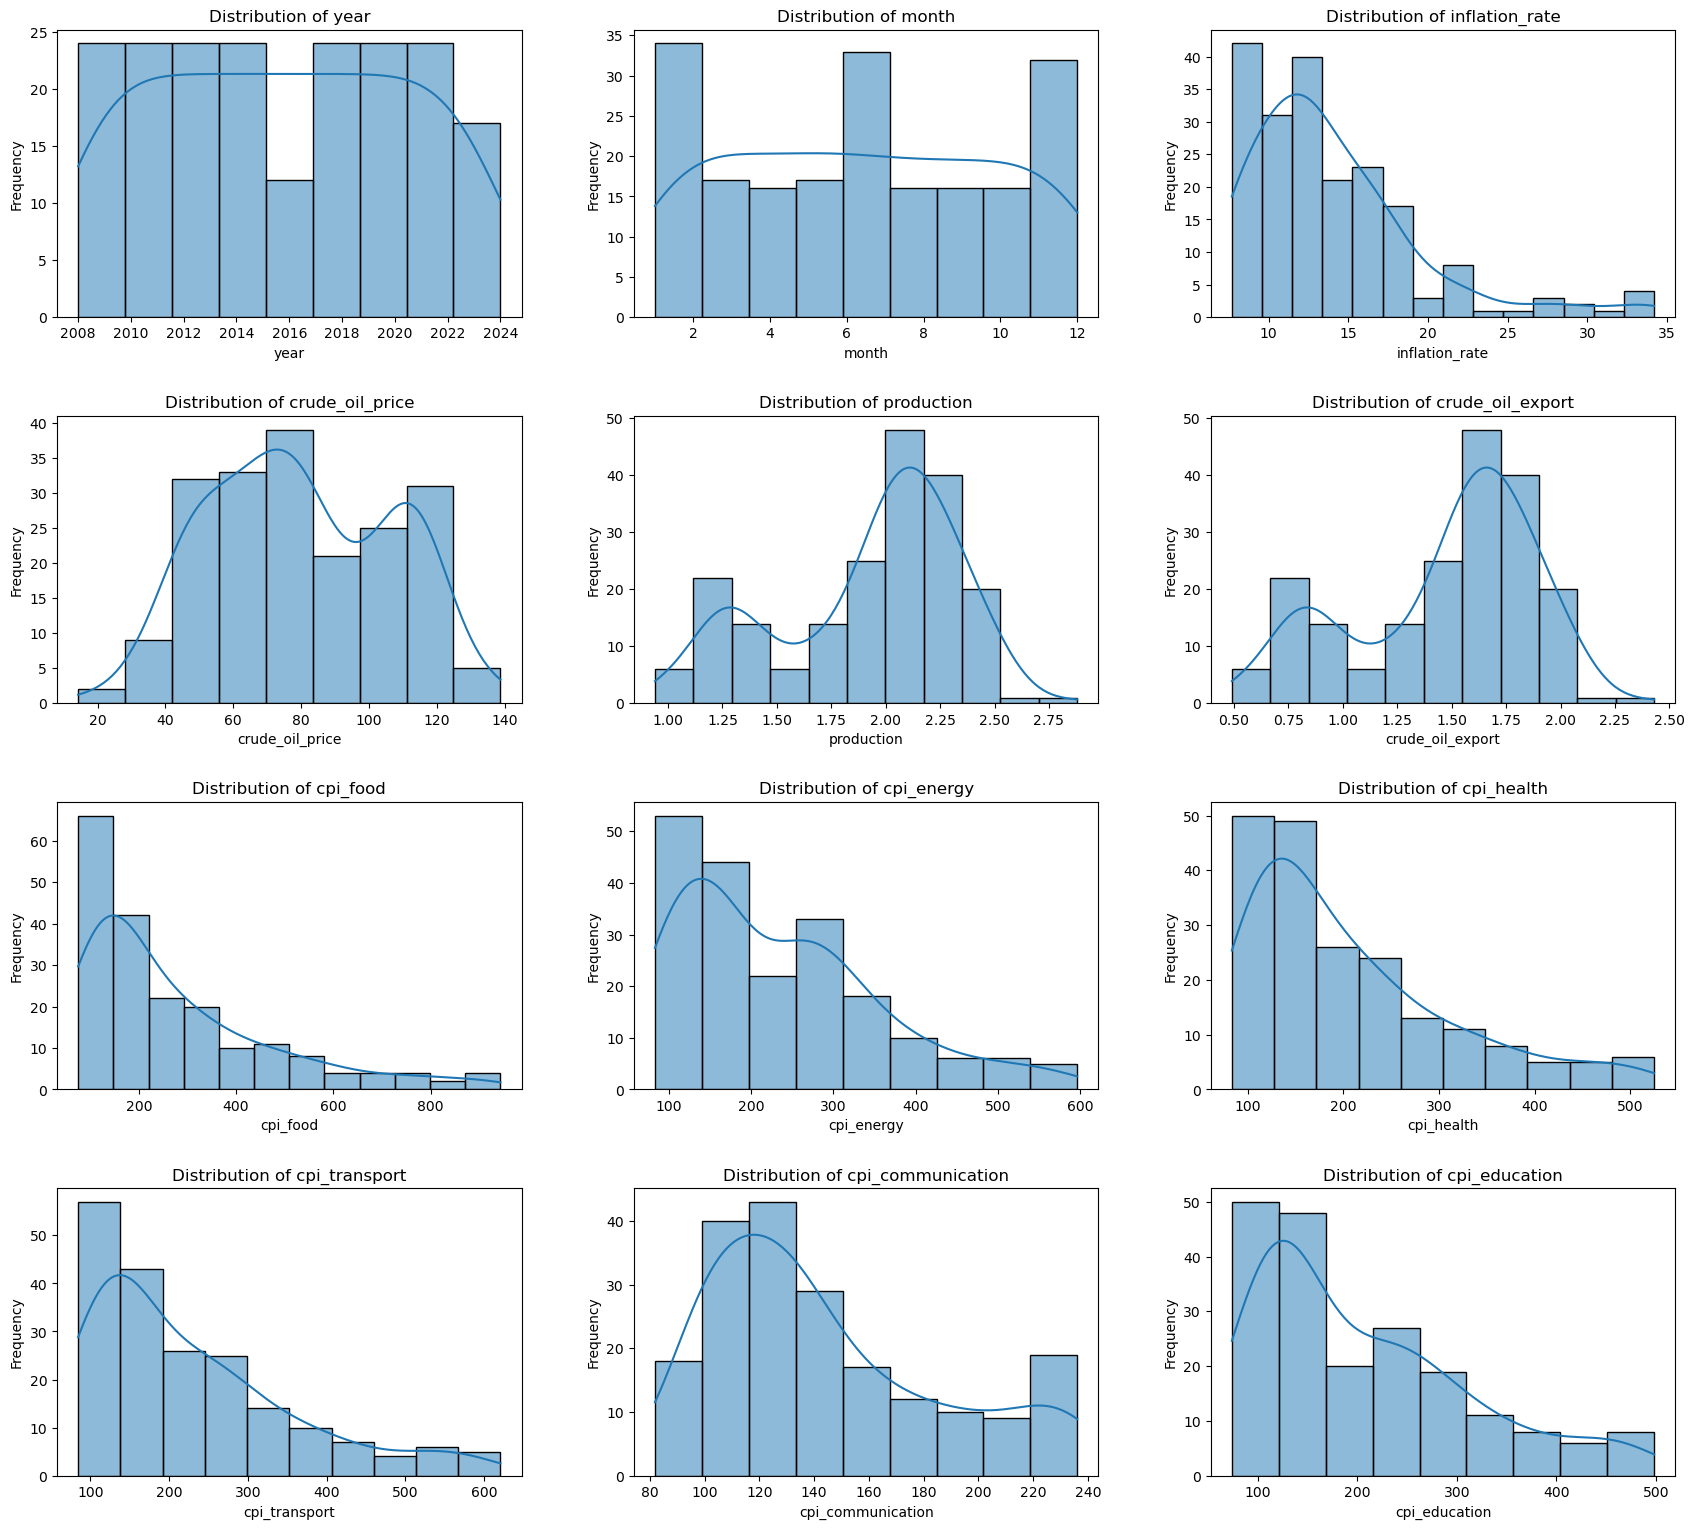

In [17]:
#creating a function to plot the distribution of the variables
def univariate_analysis(numerical_df):
    num_cols = len(numerical_df.columns)
    fig, axes = plt.subplots(nrows=(num_cols // 3) + 1, ncols=3,
                             figsize=(18, 4 * ((num_cols // 3) + 1)))
    fig.tight_layout(pad=5.0)

    axes = axes.flatten()  # Flatten axes array for easy iteration

    for i, col_name in enumerate(numerical_df.columns):
        sns.histplot(data=numerical_df, x=col_name, kde=True, ax=axes[i])
        # Use KDE for a smooth distribution curve
        axes[i].set_title(f'Distribution of {col_name}')
        axes[i].set_xlabel(col_name)
        axes[i].set_ylabel('Frequency')

    # Hide any extra subplots if the number of numeric columns is not a multiple of 3
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.show()

univariate_analysis(numerical_df)

In [18]:
df.columns

Index(['year', 'month', 'inflation_rate', 'crude_oil_price', 'production',
       'crude_oil_export', 'cpi_food', 'cpi_energy', 'cpi_health',
       'cpi_transport', 'cpi_communication', 'cpi_education', 'date'],
      dtype='object')

    year  inflation_rate
0   2008       11.525000
1   2009       12.591667
2   2010       13.758333
3   2011       10.850000
4   2012       12.241667
5   2013        8.516667
6   2014        8.058333
7   2015        9.010000
8   2016       15.625000
9   2017       16.547500
10  2018       12.145833
11  2019       11.391667
12  2020       13.209167
13  2021       16.984167
14  2022       18.765000
15  2023       24.729091
16  2024       32.771667


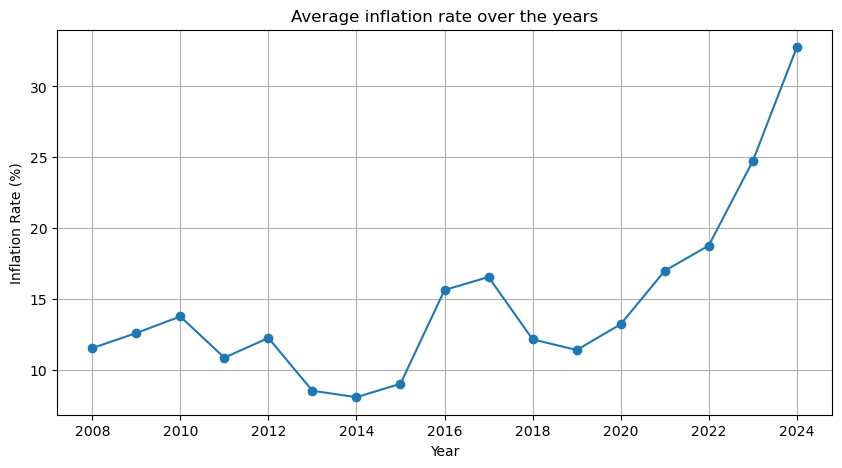

In [19]:
#The overall inflation rate change over the years

yearly_inflation = df.groupby('year')['inflation_rate'].mean().reset_index()
print(yearly_inflation)

plt.figure(figsize=(10,5))
plt.plot(yearly_inflation['year'], yearly_inflation['inflation_rate'], marker='o')
plt.title('Average inflation rate over the years')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.grid(True)
plt.show()

In [20]:
#MOnthly Inflation
monthly_inflation = df.groupby(['date'])['inflation_rate'].mean().reset_index()

monthly_inflation

,date,inflation_rate
0,2008-01-01,8.60
1,2008-02-01,8.00
2,2008-03-01,7.80
3,2008-04-01,8.20
4,2008-05-01,9.70
...,...,...
192,2024-02-01,31.70
193,2024-03-01,33.20
194,2024-04-01,33.69
195,2024-05-01,33.95


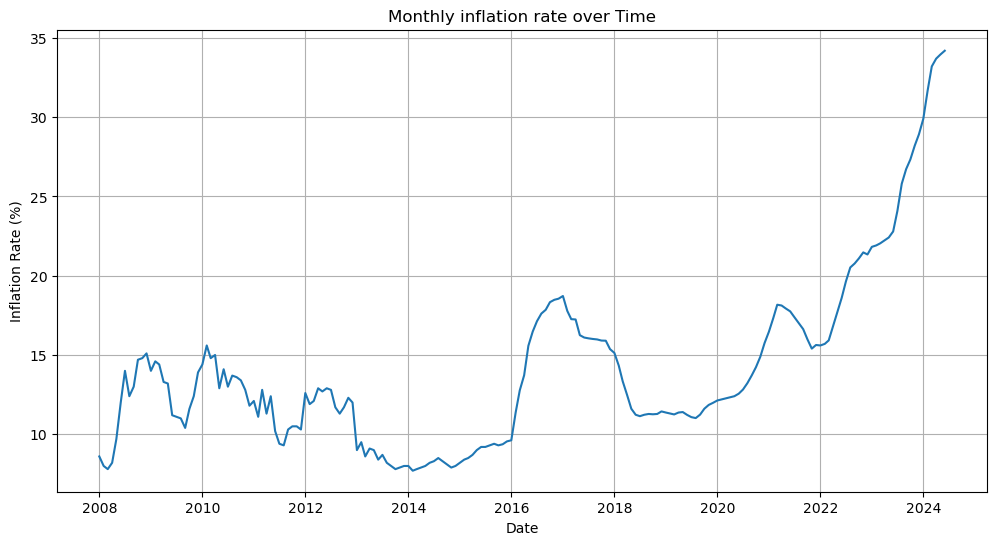

In [21]:
plt.figure(figsize=(12,6))
plt.plot(monthly_inflation['date'], monthly_inflation['inflation_rate'])
plt.title('Monthly inflation rate over Time')
plt.xlabel('Date')
plt.ylabel('Inflation Rate (%)')
plt.grid(True)
plt.show()

<AxesSubplot:title={'center':'Average Inflation by Month'}, xlabel='month_name'>

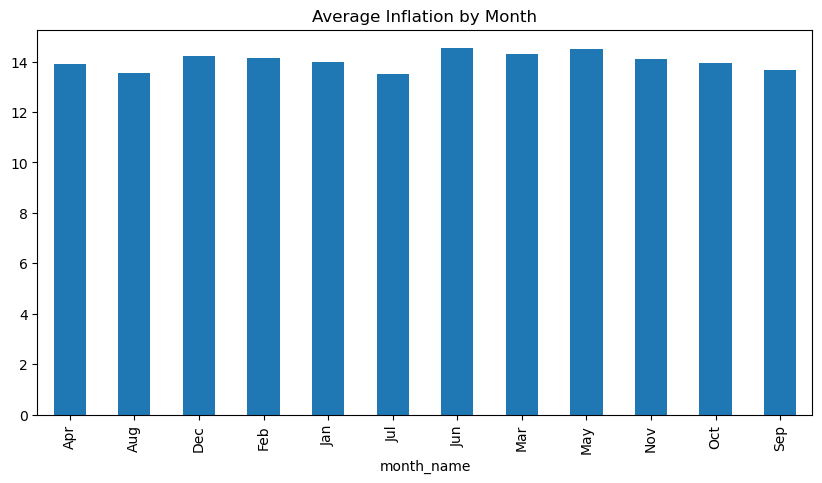

In [22]:
#Ate there seasonal patterns in Inflation?

df['month_name'] = df['date'].dt.strftime('%b')

monthly_pattern = df.groupby('month_name')['inflation_rate'].mean()

monthly_pattern.plot(kind = 'bar', figsize = (10,5), title = 'Average Inflation by Month')

inflation_rate       1.000000
cpi_food             0.839379
cpi_transport        0.815180
cpi_health           0.813232
cpi_education        0.795532
cpi_energy           0.793166
cpi_communication    0.752835
Name: inflation_rate, dtype: float64


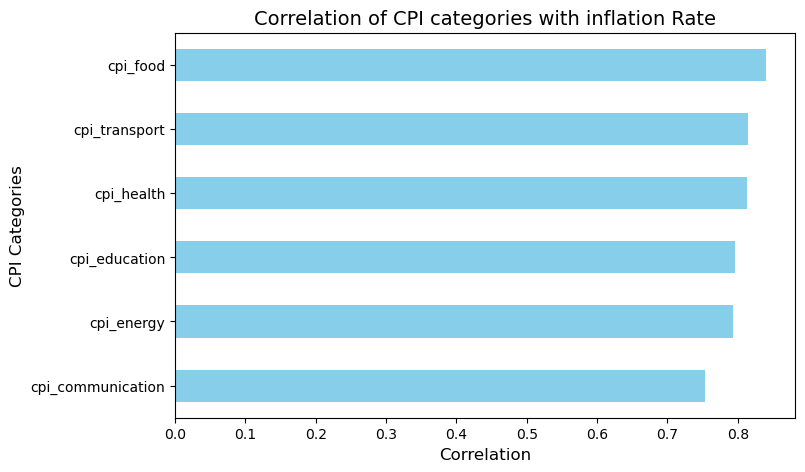

' We can see that the top 3 drivers of inflation are food, transport and health. This finding also suggest that inflation affects almost all sectors, not just one'

In [23]:
#Which CPI Category contributes more to inflation?
df.columns

cpi_cols = ['cpi_food','cpi_energy','cpi_health','cpi_transport','cpi_communication','cpi_education']
correlation = df[['inflation_rate']+ cpi_cols].corr()
cpi_corr = correlation['inflation_rate'].sort_values(ascending=False)
print(cpi_corr)

cpi_corr = cpi_corr.drop('inflation_rate')
plt.figure(figsize=(8,5))
cpi_corr.sort_values(ascending=True).plot(kind='barh', color='skyblue')

plt.title('Correlation of CPI categories with inflation Rate', fontsize = 14)
plt.xlabel('Correlation', fontsize = 12)
plt.ylabel('CPI Categories', fontsize = 12)
plt.show()

""" We can see that the top 3 drivers of inflation are food, transport and health. This finding also suggest that inflation affects almost all sectors, not just one"""

In [24]:
#Does crude oil price correlate with the inflation rate?

correlation = df[['inflation_rate']+['crude_oil_price']].corr()
print(correlation)

                 inflation_rate  crude_oil_price
inflation_rate         1.000000        -0.099851
crude_oil_price       -0.099851         1.000000


'We can see there is very little relationship between the crude oil price and the inflation rate'

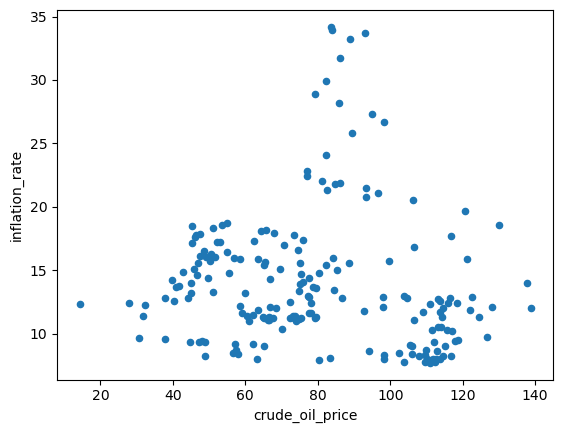

In [25]:
correlation = df[['inflation_rate']+['crude_oil_price']]
correlation
correlation.plot(kind='scatter', x = 'crude_oil_price',y='inflation_rate')

"""We can see there is very little relationship between the crude oil price and the inflation rate"""

'There seems to be a negative corrrelation between the inflation rate and the crude oil production. '

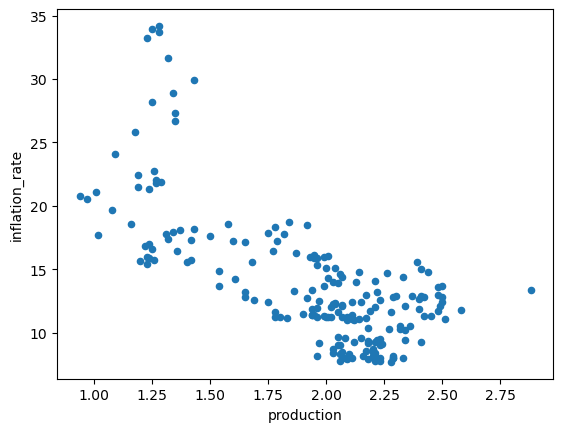

In [26]:
#How do oil production levels affect inflation?
#Assuming the production level is recorded in Million barrels per day


correlation = df[['inflation_rate']+['production']]
correlation
correlation.plot(kind='scatter', x = 'production',y='inflation_rate')

#correlation = df[['inflation_rate']+['production']].corr()
#print(correlation)

"""There seems to be a negative corrrelation between the inflation rate and the crude oil production. """

<AxesSubplot:xlabel='crude_oil_export', ylabel='inflation_rate'>

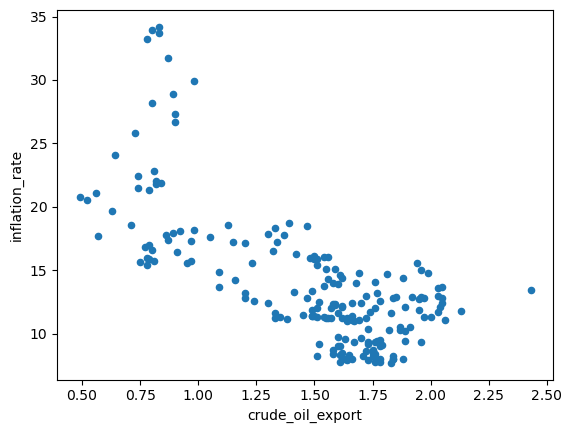

In [27]:
#How do oil export affect inflation?

correlation = df[['inflation_rate']+['crude_oil_export']]
correlation.plot(kind='scatter', x='crude_oil_export', y='inflation_rate')



In [28]:
df.head()


,year,month,inflation_rate,crude_oil_price,production,crude_oil_export,cpi_food,cpi_energy,cpi_health,cpi_transport,cpi_communication,cpi_education,date,month_name
0,2008,1,8.6,94.26,2.17,1.72,75.534431,84.612846,83.863139,86.530038,83.129440,75.284466,2008-01-01,Jan
1,2008,2,8.0,98.15,2.08,1.63,75.154185,85.231632,83.365891,88.355236,82.889814,75.457619,2008-02-01,Feb
2,2008,3,7.8,103.73,2.06,1.61,78.242523,83.251516,86.082993,84.376304,81.893471,74.826847,2008-03-01,Mar
3,2008,4,8.2,116.73,1.96,1.51,79.434268,84.348830,89.445332,88.600334,93.937865,73.664248,2008-04-01,Apr
4,2008,5,9.7,126.57,2.05,1.60,80.783677,85.574027,90.540461,87.932833,97.553285,74.880442,2008-05-01,May


<AxesSubplot:xlabel='crude_oil_export', ylabel='production'>

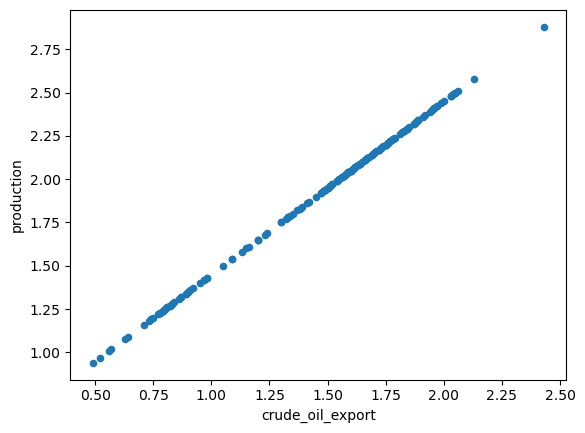

In [29]:
correlation = df[['production']+['crude_oil_export']]
correlation.plot(kind='scatter', x='crude_oil_export', y='production')

Correlation between oil price and CPI Energy:  -0.16055256546289687
Correlation between oil price and CPI Transport:  -0.1146311866743263


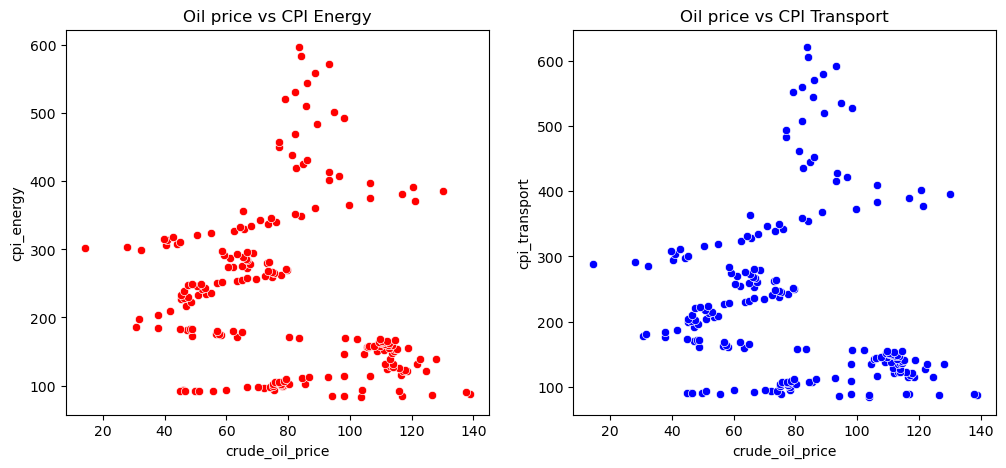

In [32]:
#Does a higher oil price push up CPI energy and CPI transport?

corr_energy = df[['crude_oil_price','cpi_energy']].corr().iloc[0,1]
corr_transport = df[['crude_oil_price','cpi_transport']].corr().iloc[0,1]

print('Correlation between oil price and CPI Energy: ', corr_energy)
print('Correlation between oil price and CPI Transport: ', corr_transport)

fig, axes = plt.subplots(1,2, figsize = (12,5))

sns.scatterplot(data=df, x = 'crude_oil_price', y='cpi_energy',ax = axes[0], color = 'red')
axes[0].set_title('Oil price vs CPI Energy')

sns.scatterplot(data=df, x = 'crude_oil_price', y='cpi_transport',ax = axes[1], color = 'blue')
axes[1].set_title('Oil price vs CPI Transport')

plt.show()

In [34]:

#Which CPI Category grows the fastest?
cpi_cols = ['cpi_food','cpi_energy','cpi_health','cpi_transport','cpi_communication','cpi_education']
cpi_growth = {}
for col in cpi_cols:
    start = df[col].iloc[0]
    end = df[col].iloc[-1]
    years = df['year'].iloc[-1] - df['year'].iloc[0] + 1
    cpi_growth[col]= ((end/start) ** (1/years) - 1) *100
    
print('Average Annual Growth Rate (CAGR): ')  #Compound Annual Growth Rate
print(pd.Series(cpi_growth).sort_values(ascending=False))

Average Annual Growth Rate (CAGR): 
cpi_food             16.012447
cpi_transport        12.291562
cpi_energy           12.174057
cpi_education        11.757979
cpi_health           11.389909
cpi_communication     6.331762
dtype: float64


In [37]:
df_yearly = df.groupby('year')[cpi_cols].mean()
cpi_yoy = df_yearly.pct_change() * 100  #Year over year growth rate
cpi_yoy.mean().sort_values(ascending=False)

cpi_food             16.035185
cpi_transport        12.681987
cpi_energy           12.358840
cpi_education        11.957126
cpi_health           11.422025
cpi_communication     5.977781
dtype: float64

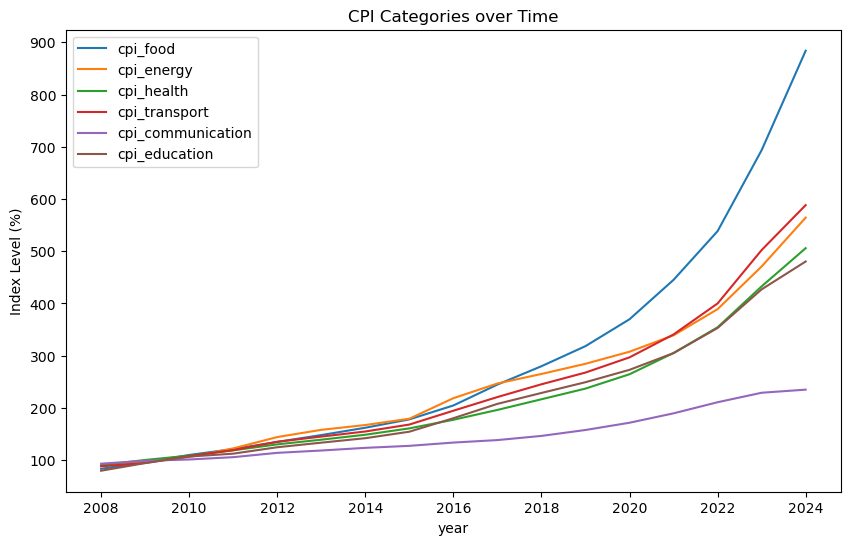

In [38]:
df_yearly[cpi_cols].plot(figsize = (10,6))
plt.title('CPI Categories over Time')
plt.ylabel('Index Level (%)')
plt.legend(loc='upper left')
plt.show()

Most Volatile CPI Categories (Month-to-Month): 
cpi_transport        1.258981
cpi_communication    1.189567
cpi_education        1.100099
cpi_energy           1.048578
cpi_health           0.932672
cpi_food             0.899465
dtype: float64


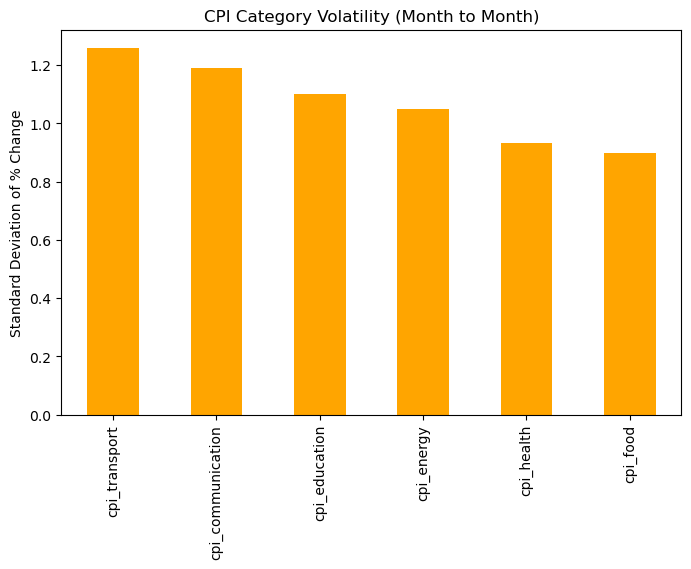

In [41]:
#Which CPI Category is most volatile month to month?

cpi_monthly_change = df[cpi_cols].pct_change() * 100

volatility = cpi_monthly_change.std().sort_values(ascending=False)
print('Most Volatile CPI Categories (Month-to-Month): ')
print(volatility)

volatility.plot(kind='bar', color ='orange', figsize = (8,5))
plt.title('CPI Category Volatility (Month to Month)')
plt.ylabel('Standard Deviation of % Change')
plt.show()